In [62]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_gaussian_quantiles, make_multilabel_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from catboost import CatBoostClassifier

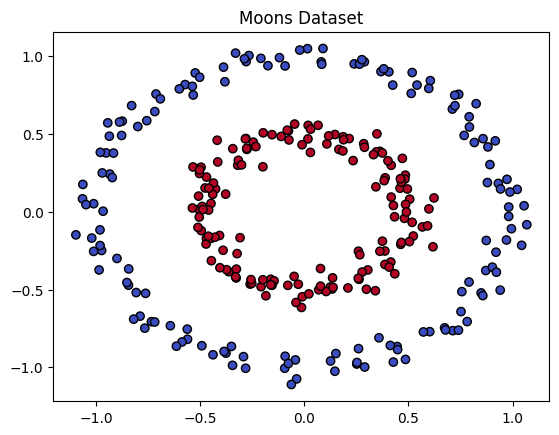

In [63]:
# 1. Moons
X1, y1 = make_moons(n_samples=1000, noise=0.2, random_state=42)
X2, y2 = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

X = X2
y = y2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Moons Dataset")
plt.show()

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
model = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=10, batch_size=32)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [66]:
cb = CatBoostClassifier(verbose=100, task_type="GPU")
cb_history = cb.fit(
        X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50
    )
y_cb = cb.predict(X_val, prediction_type="Probability")[:, 1]


Learning rate set to 0.081309
0:	learn: 0.5228076	test: 0.5180536	best: 0.5180536 (0)	total: 9.82ms	remaining: 9.81s


100:	learn: 0.0055181	test: 0.0197204	best: 0.0195913 (95)	total: 1.49s	remaining: 13.2s
200:	learn: 0.0026259	test: 0.0137964	best: 0.0137960 (198)	total: 3.21s	remaining: 12.8s
300:	learn: 0.0016904	test: 0.0109509	best: 0.0109509 (300)	total: 4.91s	remaining: 11.4s
400:	learn: 0.0013163	test: 0.0100123	best: 0.0099977 (395)	total: 6.64s	remaining: 9.93s
500:	learn: 0.0011085	test: 0.0093198	best: 0.0091813 (485)	total: 8.32s	remaining: 8.29s
600:	learn: 0.0009422	test: 0.0086443	best: 0.0086106 (596)	total: 10s	remaining: 6.64s
700:	learn: 0.0008376	test: 0.0082852	best: 0.0082852 (700)	total: 11.7s	remaining: 5s
800:	learn: 0.0007637	test: 0.0080896	best: 0.0080711 (795)	total: 13.4s	remaining: 3.33s
900:	learn: 0.0006794	test: 0.0076958	best: 0.0076845 (897)	total: 15.1s	remaining: 1.66s
bestTest = 0.007581501537
bestIteration = 923
Shrink model to first 924 iterations.


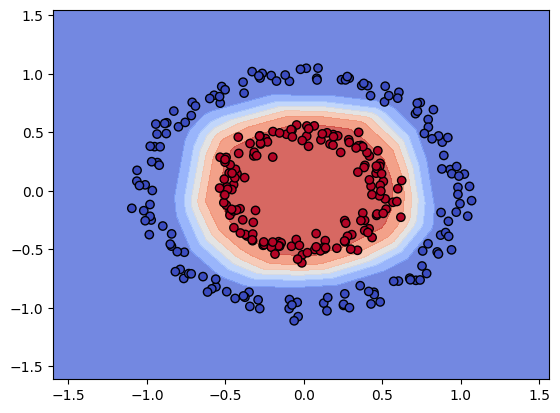

In [ ]:
# Meshgrid
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on grid
Z = model.predict(grid, verbose=0)
Z = (Z).reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.savefig("images/circlesnn.pdf")